# Coronary Heart disease Analysis

**About Dataset**
Heart Failure: The datasets shows that 66% patients who have heart failure have CAD. This is the highest among the rest of the 26 diseases/habits that potentially increase the risk of heart failure.

**What is CAD?**
Coronary artery disease is caused by plaque buildup such as deposits of cholesterol and other substances in the wall of the arteries that supply blood to the heart. This prompted me to focus on CAD prediction as it is caused by life style which might be able allow potential patients to control the risk when it is still not severe. On the other hand Heart Failure is much more complicated & severe affected by some diseases which increases potential risk of collapse.


### This model is trained on group of patient with different ejection fraction and will be able to predict wthether patient has heart failure or not. The predction is multiclass, "Normal", "Low", MildHF", "SevereHF"

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import scipy


In [9]:
!pip install scipy


In [10]:
#importing data

df = pd.read_csv("C:/Users/willi/Documents/IBM_course/Data/coronary.csv")

df1 = df.copy()
df

,sno,age,gender,type,day_icu,outcome,smoking,alcohol,diabetes,hypertension,...,chest_infection,count,haemoglobin,anaemia,severe_anaemia,glucose,group_age,group_plate,group_leuk,group_ejectf
0,1,81,M,E,2,DISCHARGE,0,0,1,0,...,0,1,9.5,1,0,80.0,76-150,normal,high,d_normal
1,3,53,M,E,3,DISCHARGE,0,0,1,0,...,0,1,10.6,0,0,187.0,46-60,normal,high,d_normal
2,5,60,F,E,9,DISCHARGE,0,0,0,1,...,0,1,13.6,0,0,144.0,46-60,low,normal,d_normal
3,6,44,M,E,8,DISCHARGE,0,0,1,1,...,0,1,13.5,0,0,217.0,31-45,normal,high,d_normal
4,7,56,F,E,2,DISCHARGE,0,0,1,1,...,0,1,13.3,0,0,277.0,46-60,normal,high,d_normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6606,15753,86,F,O,1,DISCHARGE,0,0,1,1,...,0,1,8.8,1,0,131.0,76-150,normal,high,d_normal
6607,15754,50,M,E,2,EXPIRY,0,0,1,1,...,0,1,13.2,0,0,248.0,46-60,low,high,d_normal
6608,15755,82,M,E,5,DISCHARGE,0,0,0,1,...,0,1,9.3,1,0,210.0,76-150,normal,high,d_normal
6609,15756,59,F,O,2,DISCHARGE,0,0,0,1,...,0,1,13.1,0,0,153.0,46-60,normal,high,d_normal


In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,6601,6602,6603,6604,6605,6606,6607,6608,6609,6610
sno,1,3,5,6,7,11,17,24,26,32,...,15745,15746,15747,15748,15752,15753,15754,15755,15756,15757
age,81,53,60,44,56,52,54,85,56,73,...,60,60,72,61,60,86,50,82,59,59
gender,M,M,F,M,F,M,M,M,M,F,...,F,F,F,F,F,F,M,M,F,F
type,E,E,E,E,E,E,O,O,O,E,...,E,E,E,E,E,O,E,E,O,O
day_icu,2,3,9,8,2,11,1,8,5,2,...,4,4,3,1,9,1,2,5,2,2
outcome,DISCHARGE,DISCHARGE,DISCHARGE,DISCHARGE,DISCHARGE,EXPIRY,DISCHARGE,DISCHARGE,DAMA,EXPIRY,...,DAMA,DAMA,EXPIRY,DISCHARGE,DISCHARGE,DISCHARGE,EXPIRY,DISCHARGE,DISCHARGE,DISCHARGE
smoking,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alcohol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
diabetes,1,1,0,1,1,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
hypertension,0,0,1,1,1,1,0,0,0,0,...,1,1,1,1,0,1,1,1,1,1


In [12]:
#Verifying the dtype
df.dtypes

sno                            int64
age                            int64
gender                        object
type                          object
day_icu                        int64
outcome                       object
smoking                        int64
alcohol                        int64
diabetes                       int64
hypertension                   int64
cad                            int64
cardiomyopathy                 int64
ckd                            int64
leuk_count                   float64
platelets                    float64
urea                         float64
creatinine                   float64
bnp                          float64
raised_cardiac                 int64
eject_fraction                 int64
stable_angina                  int64
acs                            int64
stemi                          int64
atypical_chest_pain            int64
heart_failure                  int64
hfref                          int64
hfnef                          int64
v

In [13]:
#checking missing values 
df.isna().sum()

sno                          0
age                          0
gender                       0
type                         0
day_icu                      0
outcome                      0
smoking                      0
alcohol                      0
diabetes                     0
hypertension                 0
cad                          0
cardiomyopathy               0
ckd                          0
leuk_count                   0
platelets                    0
urea                         0
creatinine                   0
bnp                          0
raised_cardiac               0
eject_fraction               0
stable_angina                0
acs                          0
stemi                        0
atypical_chest_pain          0
heart_failure                0
hfref                        0
hfnef                        0
valvular                     0
chb                          0
sick_sinus                   0
acute_kidney                 0
cva_infract                  0
cva_blee

In [14]:
#### finding and analysing the target varable

df["group_ejectf"].value_counts(normalize=True)

group_ejectf
d_normal         0.864166
a_severeHF       0.096052
c_belowNormal    0.028286
b_mildHF         0.011496
Name: proportion, dtype: float64

So "group_ejectf " is our target column, here the outcome is divided in four (a,b,c,d) classes. 

## Preprocessing the different dtypes 

##### 1. Numerical type </br>
 1.1 Binary type</br>
 1.2 Contineous type

##### 2. Non-numeric(object) type</br>
  1.1 Nominal type</br>
  1.2 ordinal type
  
 We're going to filter each dtype into separate list for further processing 

In [15]:
feat_cols = df.columns.tolist()
# feat_num_bin = df[df[]]
feat_cols

['sno',
 'age',
 'gender',
 'type',
 'day_icu',
 'outcome',
 'smoking',
 'alcohol',
 'diabetes',
 'hypertension',
 'cad',
 'cardiomyopathy',
 'ckd',
 'leuk_count',
 'platelets',
 'urea',
 'creatinine',
 'bnp',
 'raised_cardiac',
 'eject_fraction',
 'stable_angina',
 'acs',
 'stemi',
 'atypical_chest_pain',
 'heart_failure',
 'hfref',
 'hfnef',
 'valvular',
 'chb',
 'sick_sinus',
 'acute_kidney',
 'cva_infract',
 'cva_bleed',
 'atrial_fibril',
 'ventricular',
 'psvt',
 'congenital',
 'urinary_tract',
 'neuro_cardiogenic_syncope',
 'orthostatic',
 'infective_endocarditis',
 'deep_venous',
 'pulmonary_embolism',
 'chest_infection',
 'count',
 'haemoglobin',
 'anaemia',
 'severe_anaemia',
 'glucose',
 'group_age',
 'group_plate',
 'group_leuk',
 'group_ejectf']

In [16]:
#finding unique values in each column 
unique_counts_per_column = df[feat_cols].apply(lambda x: x.nunique())
unique_counts_per_column

sno                          6611
age                            87
gender                          2
type                            2
day_icu                        41
outcome                         3
smoking                         2
alcohol                         2
diabetes                        2
hypertension                    2
cad                             2
cardiomyopathy                  2
ckd                             2
leuk_count                    368
platelets                     561
urea                          282
creatinine                    393
bnp                          1266
raised_cardiac                  2
eject_fraction                 44
stable_angina                   2
acs                             2
stemi                           2
atypical_chest_pain             2
heart_failure                   2
hfref                           2
hfnef                           2
valvular                        2
chb                             2
sick_sinus    

In [17]:
#fitering out dtypes as object 

object_columns = df.select_dtypes(include='object').columns.tolist()
object_columns

['gender',
 'type',
 'outcome',
 'group_age',
 'group_plate',
 'group_leuk',
 'group_ejectf']

#### we can identidy binary columns as only 2 values (o and 1)
#### we dont need to process them as they are alreay in 0 and 1 form


In [24]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 7.2 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.0 MB 6.4 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 6.4 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/11.0 MB 6.3 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.0 MB 6.2 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.0 MB 6.2 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 6.2 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/11.0 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.9 MB/s eta 0:00:00


In [25]:
#converting gender and type to binary features as only two values 

from sklearn.preprocessing import LabelBinarizer

cat_cols = ["gender", "type"]
lb = LabelBinarizer()

for column in df[cat_cols]:
     df[column] = lb.fit_transform(df[column])  #converting and replacing at the same time in original dataframe
    

In [26]:
#As we can see out feature "Outcome" is ordinal type category as no relation or meaning of order 
# we'll process it with OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

#instatiating object
ohc = OneHotEncoder()

converted_outcome = ohc.fit_transform(df[["outcome"]]).toarray()

converted_outcome_df = pd.DataFrame(converted_outcome)

df = pd.concat([df, converted_outcome_df], axis=1)
df

#dropping old "outcome" columns as converted
df.drop("outcome", axis=1, inplace=True)
df[50:100]

,sno,age,gender,type,day_icu,smoking,alcohol,diabetes,hypertension,cad,...,anaemia,severe_anaemia,glucose,group_age,group_plate,group_leuk,group_ejectf,0,1,2
50,186,60,1,0,0,0,0,0,0,1,...,0,0,86.3,46-60,low,high,d_normal,0.0,0.0,1.0
51,196,70,0,0,10,0,0,0,1,1,...,1,0,141.0,61-75,low,high,d_normal,0.0,0.0,1.0
52,197,73,1,0,3,0,0,0,0,1,...,1,0,137.0,61-75,low,high,d_normal,0.0,0.0,1.0
53,201,61,1,0,2,0,0,0,0,1,...,0,0,86.3,61-75,high,high,d_normal,0.0,0.0,1.0
54,203,82,0,0,0,0,0,0,1,1,...,0,0,182.0,76-150,normal,high,d_normal,0.0,1.0,0.0
55,206,59,0,0,5,0,0,1,0,0,...,0,0,186.0,46-60,normal,high,d_normal,0.0,0.0,1.0
56,211,80,1,0,2,0,0,1,1,1,...,0,0,119.0,76-150,low,normal,a_severeHF,0.0,1.0,0.0
57,212,75,0,0,5,0,0,0,1,1,...,0,0,208.0,61-75,low,high,d_normal,0.0,0.0,1.0
58,219,55,0,0,2,0,0,0,0,1,...,0,0,42.0,46-60,normal,high,d_normal,0.0,0.0,1.0
59,224,39,1,1,0,0,0,1,1,0,...,0,0,74.0,31-45,normal,normal,a_severeHF,0.0,1.0,0.0


In [27]:
#now finally converting ordinal type categorical columns using Ordinalencoder

from sklearn.preprocessing import OrdinalEncoder

#defining ordinal columns
cat_cols = ["group_plate", "group_leuk", "group_ejectf" ]

#defining order of columns
cat_order_plate = ['normal', 'low', 'high']
cat_order_leuk = ['normal', 'low', 'high']
cat_order_eject =  ['d_normal', 'c_belowNormal', 'b_mildHF', "a_severeHF" ]

# assigning custom order as subject need 
oe = OrdinalEncoder(categories=[cat_order_plate, cat_order_leuk, cat_order_eject])

#fitting and transforming
ordinal_cols = oe.fit_transform(df[["group_plate", "group_leuk", "group_ejectf" ]])

ordinal_cols_df = pd.DataFrame(ordinal_cols, columns=cat_cols)
df[cat_cols] = ordinal_cols_df #replacing with the original columns in df datset

df

,sno,age,gender,type,day_icu,smoking,alcohol,diabetes,hypertension,cad,...,anaemia,severe_anaemia,glucose,group_age,group_plate,group_leuk,group_ejectf,0,1,2
0,1,81,1,0,2,0,0,1,0,0,...,1,0,80.0,76-150,0.0,2.0,0.0,0.0,1.0,0.0
1,3,53,1,0,3,0,0,1,0,1,...,0,0,187.0,46-60,0.0,2.0,0.0,0.0,1.0,0.0
2,5,60,0,0,9,0,0,0,1,0,...,0,0,144.0,46-60,1.0,0.0,0.0,0.0,1.0,0.0
3,6,44,1,0,8,0,0,1,1,1,...,0,0,217.0,31-45,0.0,2.0,0.0,0.0,1.0,0.0
4,7,56,0,0,2,0,0,1,1,1,...,0,0,277.0,46-60,0.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6606,15753,86,0,1,1,0,0,1,1,1,...,1,0,131.0,76-150,0.0,2.0,0.0,0.0,1.0,0.0
6607,15754,50,1,0,2,0,0,1,1,0,...,0,0,248.0,46-60,1.0,2.0,0.0,0.0,0.0,1.0
6608,15755,82,1,0,5,0,0,0,1,1,...,1,0,210.0,76-150,0.0,2.0,0.0,0.0,1.0,0.0
6609,15756,59,0,1,2,0,0,0,1,1,...,0,0,153.0,46-60,0.0,2.0,0.0,0.0,1.0,0.0


In [28]:
#dropping group_age columns as age is already as separate feature 

df.drop("group_age", axis=1, inplace=True)
df

,sno,age,gender,type,day_icu,smoking,alcohol,diabetes,hypertension,cad,...,haemoglobin,anaemia,severe_anaemia,glucose,group_plate,group_leuk,group_ejectf,0,1,2
0,1,81,1,0,2,0,0,1,0,0,...,9.5,1,0,80.0,0.0,2.0,0.0,0.0,1.0,0.0
1,3,53,1,0,3,0,0,1,0,1,...,10.6,0,0,187.0,0.0,2.0,0.0,0.0,1.0,0.0
2,5,60,0,0,9,0,0,0,1,0,...,13.6,0,0,144.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6,44,1,0,8,0,0,1,1,1,...,13.5,0,0,217.0,0.0,2.0,0.0,0.0,1.0,0.0
4,7,56,0,0,2,0,0,1,1,1,...,13.3,0,0,277.0,0.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6606,15753,86,0,1,1,0,0,1,1,1,...,8.8,1,0,131.0,0.0,2.0,0.0,0.0,1.0,0.0
6607,15754,50,1,0,2,0,0,1,1,0,...,13.2,0,0,248.0,1.0,2.0,0.0,0.0,0.0,1.0
6608,15755,82,1,0,5,0,0,0,1,1,...,9.3,1,0,210.0,0.0,2.0,0.0,0.0,1.0,0.0
6609,15756,59,0,1,2,0,0,0,1,1,...,13.1,0,0,153.0,0.0,2.0,0.0,0.0,1.0,0.0


### No all the columns are in numeric form, so we can proceed for further steps

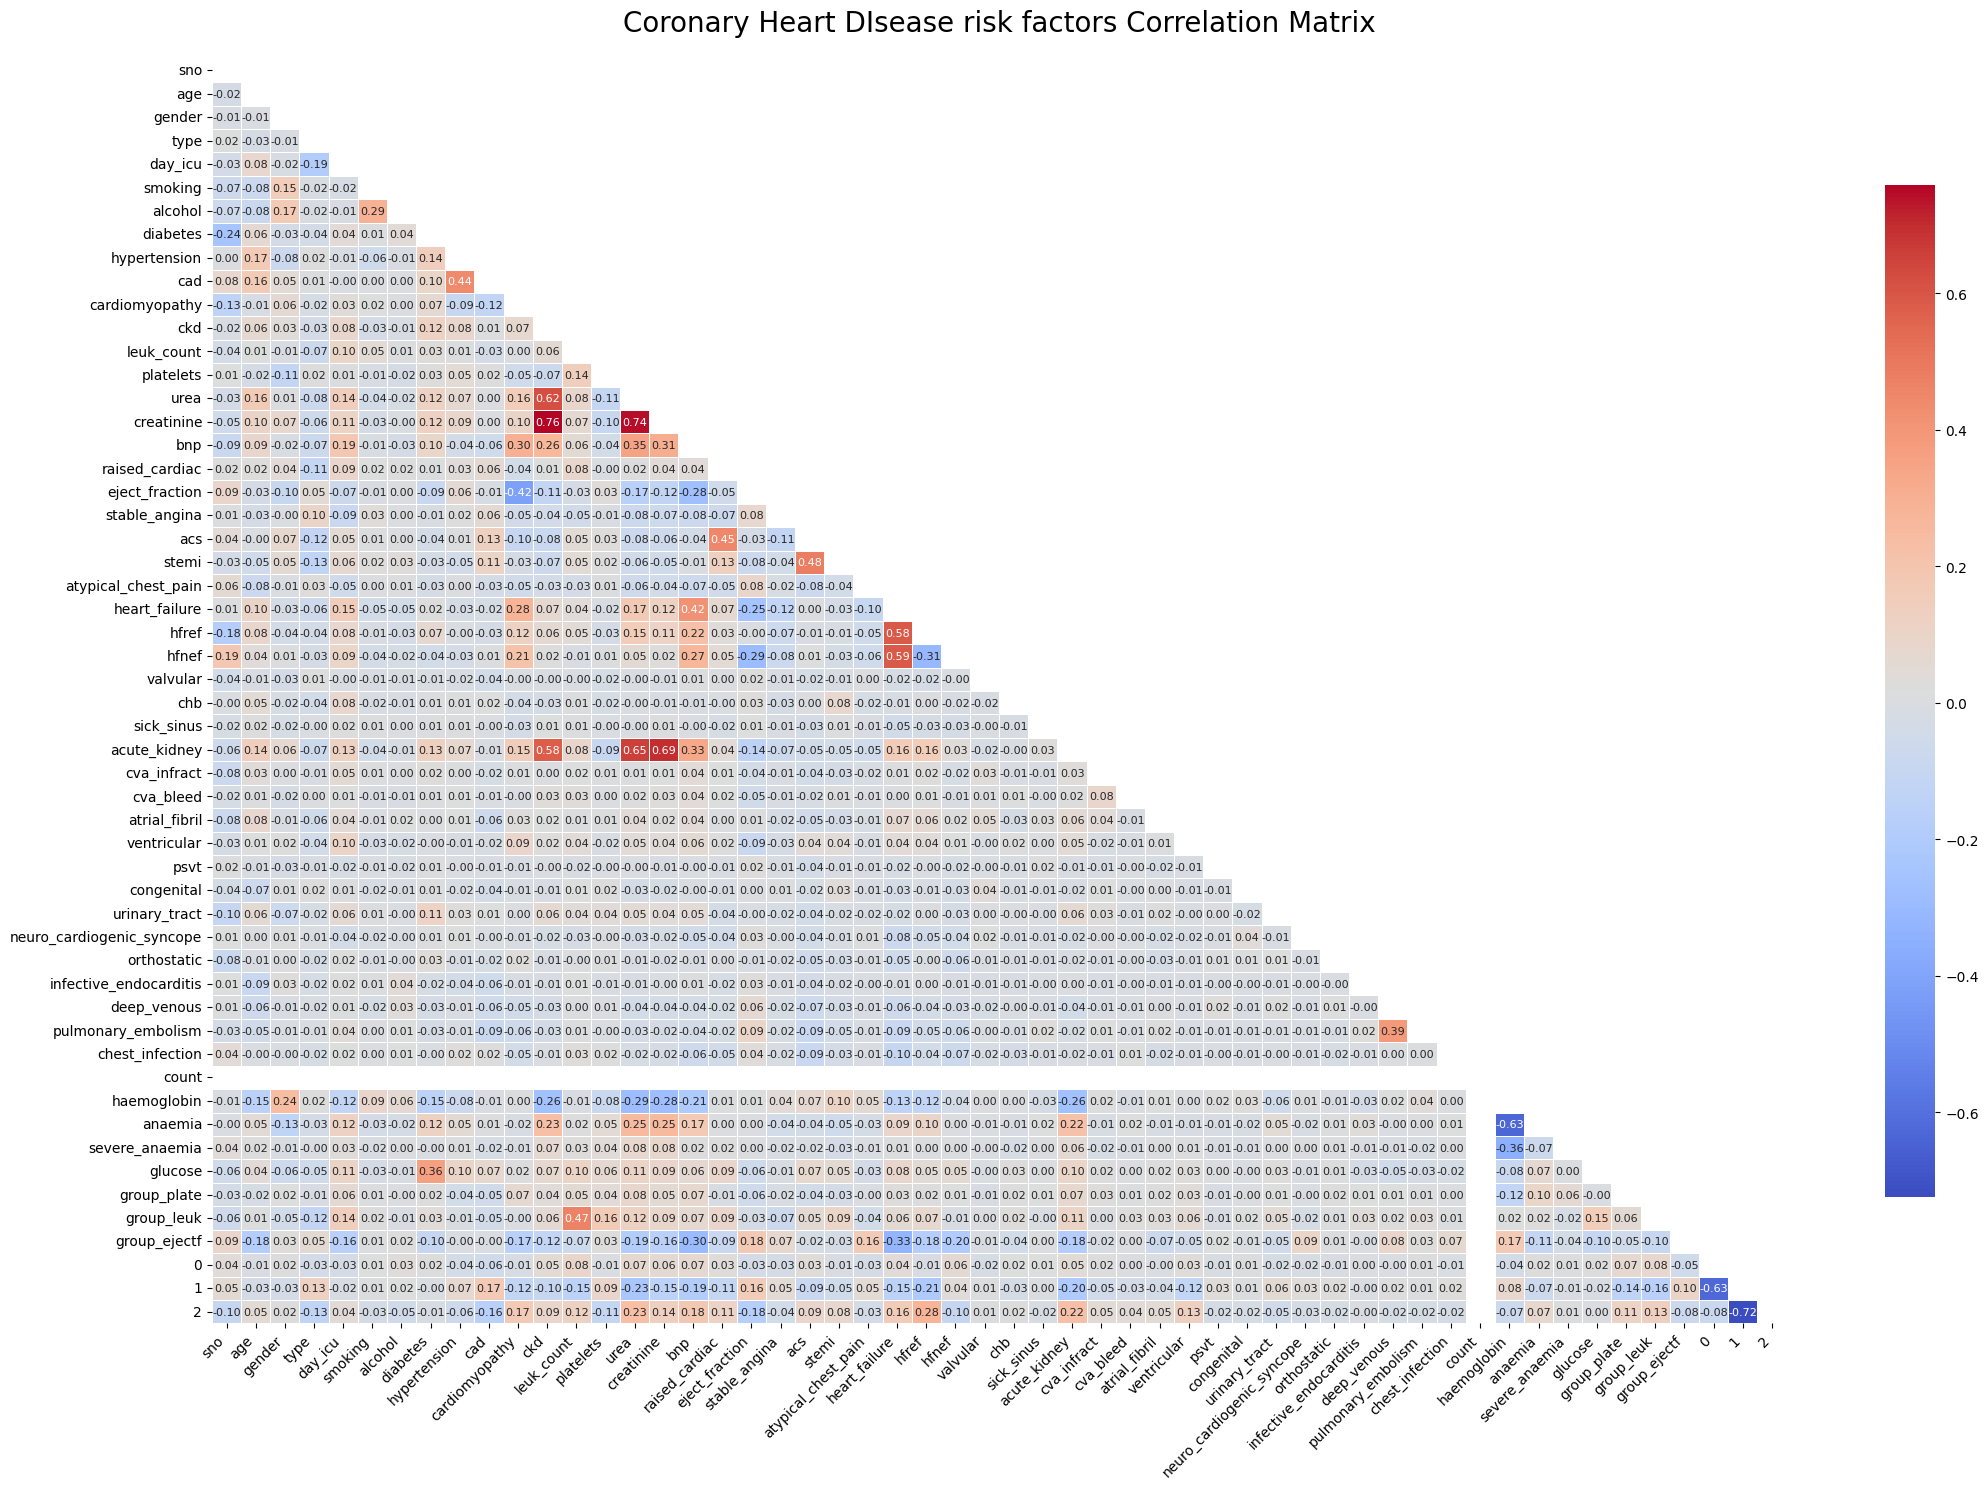

In [42]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation matrix
df_corr = df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(min(1.5 * len(df_corr.columns), 22), 15))

# Generate a mask for the upper triangle (optional, cleaner visualization)
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Plot the heatmap with better spacing and mask
sns.heatmap(
    df_corr, 
    mask=mask,  # Mask the upper triangle
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    ax=ax, 
    annot_kws={"size": 8},  # Font size for annotations
    cbar_kws={"shrink": 0.8},  # Color bar size
    xticklabels=df_corr.columns, 
    yticklabels=df_corr.columns
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.yticks(fontsize=10)

# Set the title and adjust font size and spacing
ax.set_title("Coronary Heart DIsease risk factors Correlation Matrix", fontsize=20, pad=20)

# Tight layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
#exporting and making a copy of processed df for future use

# Specify the path where you want to save the CSV file
csv_file_path = "C:/Users/willi/Documents/IBM_course/Data/heart_disease_processed.csv"

# Export the DataFrame to CSV
df.to_csv(csv_file_path, index=False)

#making a copy 
df_1 = df.copy()

In [31]:
#our final processed dataset
df

,sno,age,gender,type,day_icu,smoking,alcohol,diabetes,hypertension,cad,...,haemoglobin,anaemia,severe_anaemia,glucose,group_plate,group_leuk,group_ejectf,0,1,2
0,1,81,1,0,2,0,0,1,0,0,...,9.5,1,0,80.0,0.0,2.0,0.0,0.0,1.0,0.0
1,3,53,1,0,3,0,0,1,0,1,...,10.6,0,0,187.0,0.0,2.0,0.0,0.0,1.0,0.0
2,5,60,0,0,9,0,0,0,1,0,...,13.6,0,0,144.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6,44,1,0,8,0,0,1,1,1,...,13.5,0,0,217.0,0.0,2.0,0.0,0.0,1.0,0.0
4,7,56,0,0,2,0,0,1,1,1,...,13.3,0,0,277.0,0.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6606,15753,86,0,1,1,0,0,1,1,1,...,8.8,1,0,131.0,0.0,2.0,0.0,0.0,1.0,0.0
6607,15754,50,1,0,2,0,0,1,1,0,...,13.2,0,0,248.0,1.0,2.0,0.0,0.0,0.0,1.0
6608,15755,82,1,0,5,0,0,0,1,1,...,9.3,1,0,210.0,0.0,2.0,0.0,0.0,1.0,0.0
6609,15756,59,0,1,2,0,0,0,1,1,...,13.1,0,0,153.0,0.0,2.0,0.0,0.0,1.0,0.0


## Modeling part

we are here going to use several models to find best one and will perform hyperparameter tuning for better outcome

In [32]:
#defining x and y
x = df.drop(["group_ejectf",0,1,2], axis=1)
y= df["group_ejectf"]

In [33]:
y.value_counts(normalize=True)  #checking the value colunt of classes in target column, as class 1,2,3 are underrepresented so we'll use StratifiedShufflesplit

group_ejectf
0.0    0.864166
3.0    0.096052
1.0    0.028286
2.0    0.011496
Name: proportion, dtype: float64

### In out target variable classes have significant imbalance so using `StratifiedShuffleSplit`

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

#making list of features columns
# x.columns.astype(str)
feat_cols1 = x.columns.tolist()

#instatiating object
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

#fitting
train_idx, test_idx = next(stratified_split.split(x,y))

#create datasets
x_train = df.loc[train_idx, feat_cols1]
y_train = df.loc[train_idx, "group_ejectf"]

x_test = df.loc[test_idx, feat_cols1]
y_test = df.loc[test_idx, "group_ejectf"]

len(x_train), len(y_train), len(x_test), len(y_test)

(5288, 5288, 1323, 1323)

In [35]:
#making function to evaluate model
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
def model_evaluation(y_test, y_preds, label):
    return pd.DataFrame({
        "Accuracy": accuracy_score(y_test, y_preds),
        "Precision": precision_score(y_test, y_preds, average='weighted'),
        "Recall": recall_score(y_test, y_preds, average='weighted'),
        "F1 Score": f1_score(y_test, y_preds, average='weighted')
    }, index=[label], columns=["Accuracy", "Precision", "Recall", "F1 Score"])

C:\Users\willi\anaconda3\envs\openaitest\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\willi\anaconda3\envs\openaitest\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\willi\anaconda3\envs\openaitest\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision 

The Model score for : LogisticRegression
       Accuracy  Precision    Recall  F1 Score
Train  0.960855   0.945534  0.960855  0.951483
Test   0.957672   0.941812  0.957672  0.949078
The classification report (test) for : LogisticRegression
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1143
         1.0       0.36      0.24      0.29        38
         2.0       0.00      0.00      0.00        15
         3.0       0.86      0.96      0.91       127

    accuracy                           0.96      1323
   macro avg       0.55      0.55      0.55      1323
weighted avg       0.94      0.96      0.95      1323



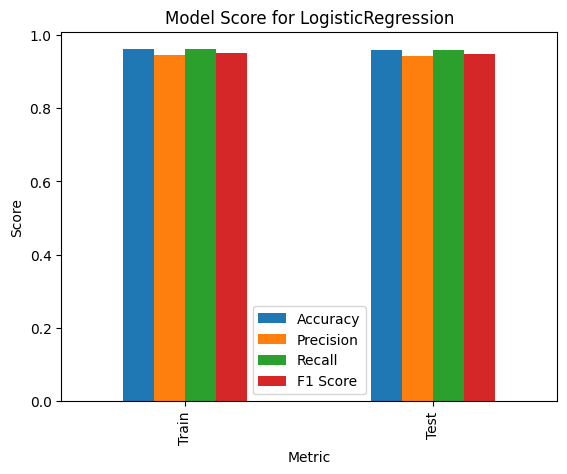

The Model score for : DecisionTreeClassifier
       Accuracy  Precision  Recall  F1 Score
Train       1.0        1.0     1.0       1.0
Test        1.0        1.0     1.0       1.0
The classification report (test) for : DecisionTreeClassifier
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1143
         1.0       1.00      1.00      1.00        38
         2.0       1.00      1.00      1.00        15
         3.0       1.00      1.00      1.00       127

    accuracy                           1.00      1323
   macro avg       1.00      1.00      1.00      1323
weighted avg       1.00      1.00      1.00      1323



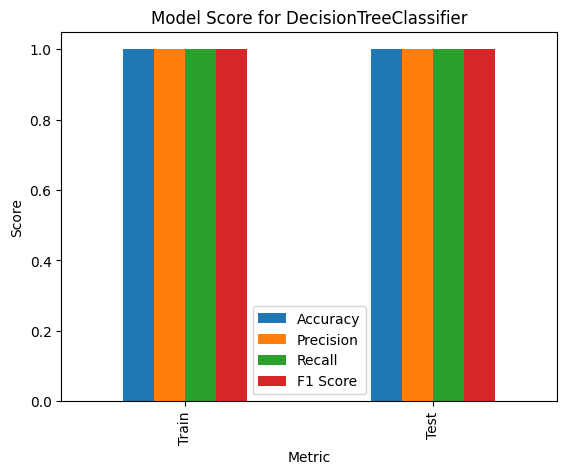

The Model score for : RandomForestClassifier
       Accuracy  Precision    Recall  F1 Score
Train  1.000000   1.000000  1.000000   1.00000
Test   0.994709   0.994755  0.994709   0.99447
The classification report (test) for : RandomForestClassifier
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1143
         1.0       1.00      0.95      0.97        38
         2.0       1.00      0.73      0.85        15
         3.0       0.98      0.99      0.98       127

    accuracy                           0.99      1323
   macro avg       0.99      0.92      0.95      1323
weighted avg       0.99      0.99      0.99      1323



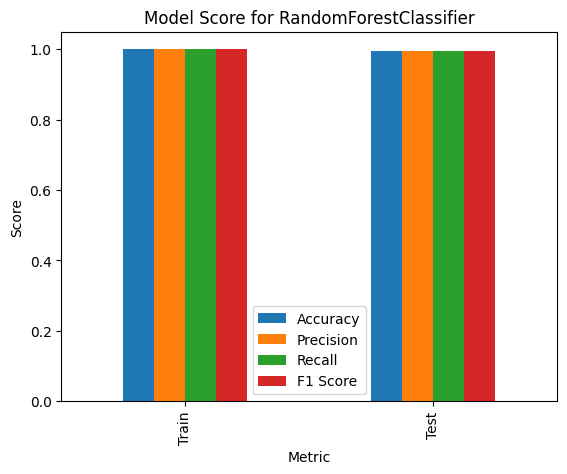

The Model score for : BaggingClassifier
       Accuracy  Precision  Recall  F1 Score
Train       1.0        1.0     1.0       1.0
Test        1.0        1.0     1.0       1.0
The classification report (test) for : BaggingClassifier
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1143
         1.0       1.00      1.00      1.00        38
         2.0       1.00      1.00      1.00        15
         3.0       1.00      1.00      1.00       127

    accuracy                           1.00      1323
   macro avg       1.00      1.00      1.00      1323
weighted avg       1.00      1.00      1.00      1323



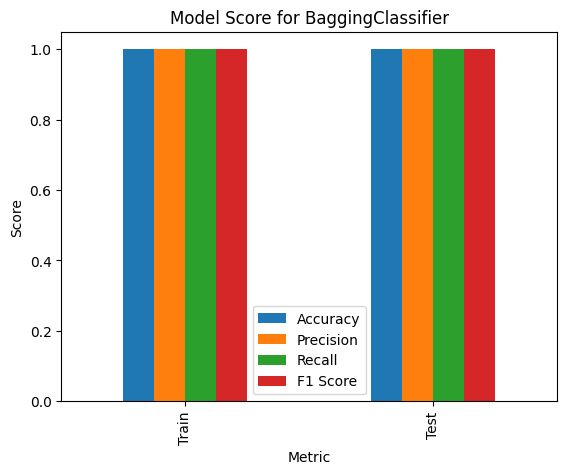

The Model score for : GradientBoostingClassifier
       Accuracy  Precision  Recall  F1 Score
Train       1.0        1.0     1.0       1.0
Test        1.0        1.0     1.0       1.0
The classification report (test) for : GradientBoostingClassifier
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1143
         1.0       1.00      1.00      1.00        38
         2.0       1.00      1.00      1.00        15
         3.0       1.00      1.00      1.00       127

    accuracy                           1.00      1323
   macro avg       1.00      1.00      1.00      1323
weighted avg       1.00      1.00      1.00      1323



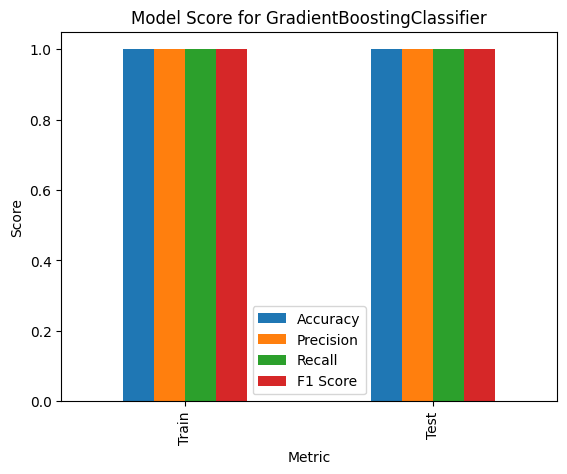

C:\Users\willi\anaconda3\envs\openaitest\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\willi\anaconda3\envs\openaitest\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\willi\anaconda3\envs\openaitest\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision 

The Model score for : VotingClassifier
       Accuracy  Precision    Recall  F1 Score
Train  0.965393   0.955190  0.965393  0.954005
Test   0.962963   0.953148  0.962963  0.950882
The classification report (test) for : VotingClassifier
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1143
         1.0       1.00      0.24      0.38        38
         2.0       0.00      0.00      0.00        15
         3.0       1.00      0.96      0.98       127

    accuracy                           0.96      1323
   macro avg       0.74      0.55      0.59      1323
weighted avg       0.95      0.96      0.95      1323



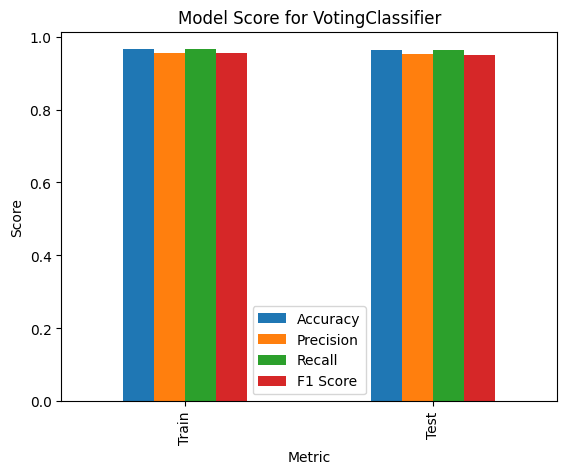

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "VotingClassifier": VotingClassifier(estimators=[
        ("dt", DecisionTreeClassifier(random_state=42)),
        ("svc", SVC(probability=True, random_state=42)),
        ("lr", LogisticRegression(random_state=42))
    ])
}

combined_score = {}
# Iterate through models
for model_name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)

    # Predictions on training and test sets
    y_preds_train = model.predict(x_train)
    y_preds_test = model.predict(x_test)

    # Calculate metrics for training set
    model_score_train = model_evaluation(y_train, y_preds_train, label="Train")
    model_score_test = model_evaluation(y_test, y_preds_test, label = "Test")
    print(f"The Model score for : {model_name}")

    #plotting the results
    final_score= pd.concat([model_score_train, model_score_test], axis=0)
    combined_score[model_name] = final_score
    print(final_score)
    print(f"The classification report (test) for : {model_name}")
    print(classification_report(y_test, y_preds_test))
    final_score.plot.bar()
    plt.title(f'Model Score for {model_name}')
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.show() 
    


Training model: LogisticRegression


C:\Users\willi\anaconda3\envs\openaitest\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\willi\anaconda3\envs\openaitest\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

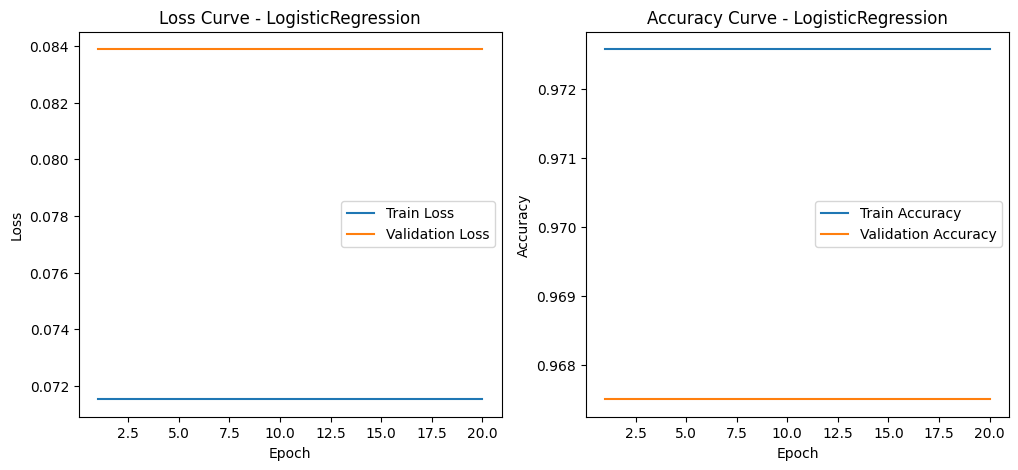


Training model: DecisionTreeClassifier
The classification report (test) for DecisionTreeClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1143
         1.0       1.00      1.00      1.00        38
         2.0       1.00      1.00      1.00        15
         3.0       1.00      1.00      1.00       127

    accuracy                           1.00      1323
   macro avg       1.00      1.00      1.00      1323
weighted avg       1.00      1.00      1.00      1323



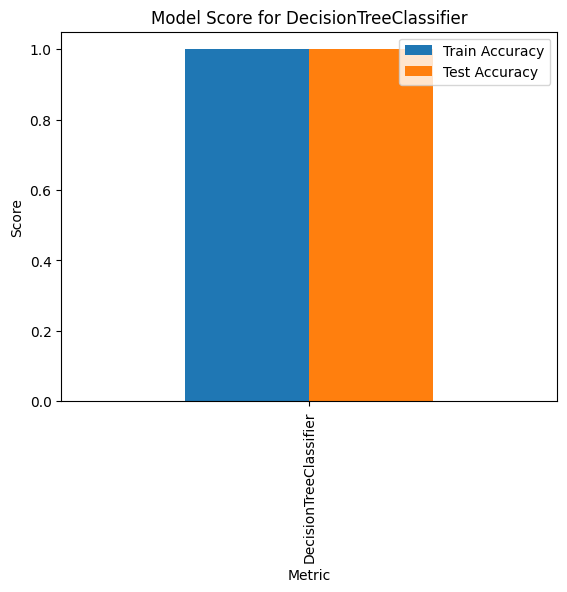


Training model: RandomForestClassifier
The classification report (test) for RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1143
         1.0       0.95      0.97      0.96        38
         2.0       1.00      0.73      0.85        15
         3.0       0.98      1.00      0.99       127

    accuracy                           1.00      1323
   macro avg       0.98      0.93      0.95      1323
weighted avg       1.00      1.00      1.00      1323



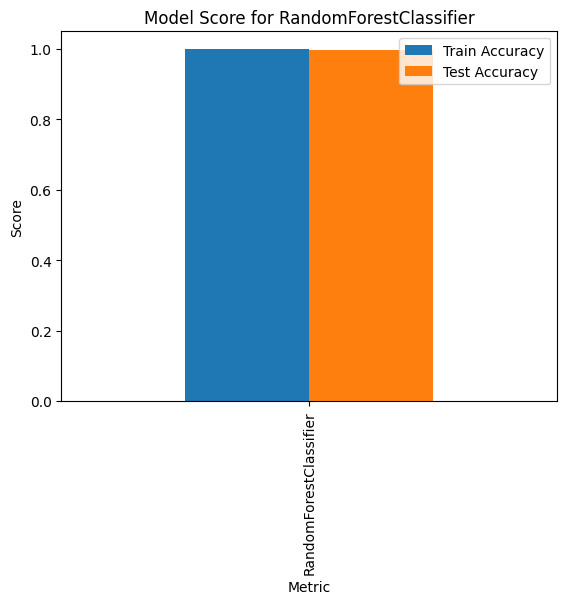


Training model: BaggingClassifier
The classification report (test) for BaggingClassifier:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1143
         1.0       1.00      1.00      1.00        38
         2.0       1.00      1.00      1.00        15
         3.0       1.00      1.00      1.00       127

    accuracy                           1.00      1323
   macro avg       1.00      1.00      1.00      1323
weighted avg       1.00      1.00      1.00      1323



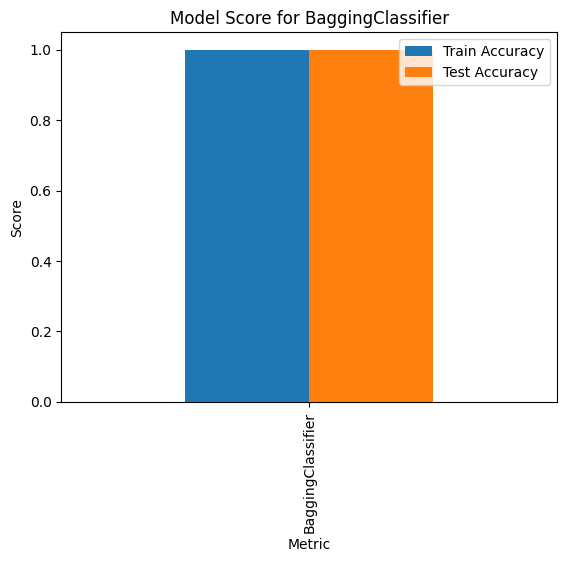


Training model: GradientBoostingClassifier


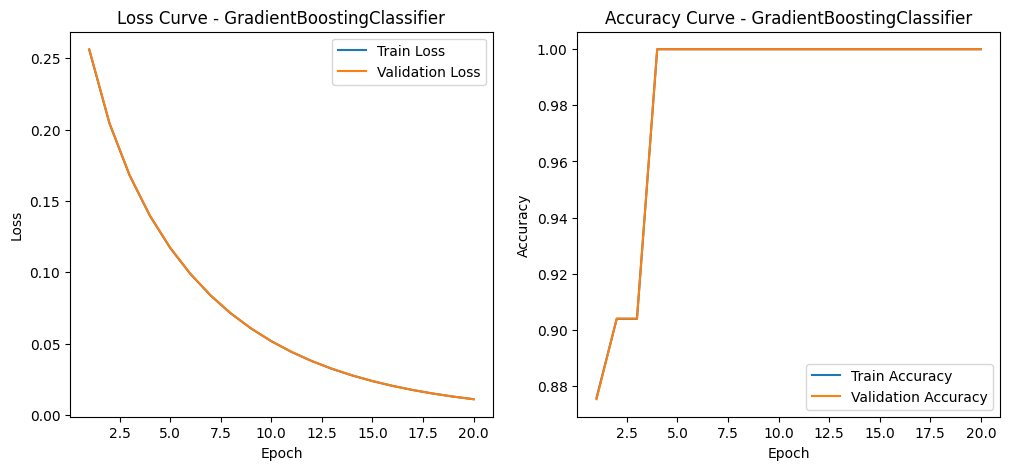


Training model: VotingClassifier


C:\Users\willi\anaconda3\envs\openaitest\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The classification report (test) for VotingClassifier:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1143
         1.0       1.00      0.24      0.38        38
         2.0       0.00      0.00      0.00        15
         3.0       1.00      0.96      0.98       127

    accuracy                           0.96      1323
   macro avg       0.74      0.55      0.59      1323
weighted avg       0.95      0.96      0.95      1323



C:\Users\willi\anaconda3\envs\openaitest\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\willi\anaconda3\envs\openaitest\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\willi\anaconda3\envs\openaitest\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

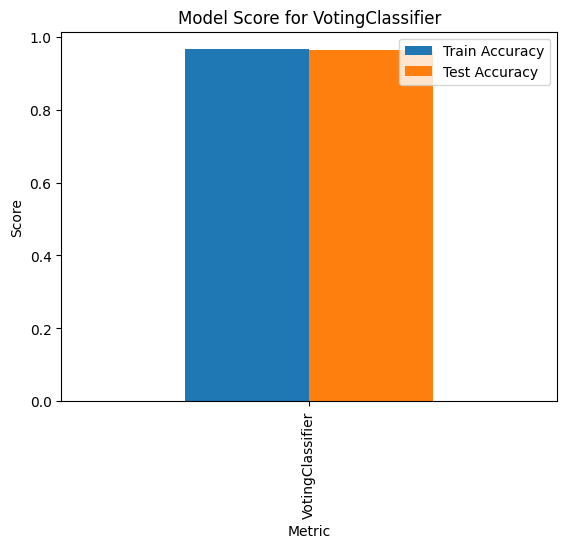

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier
)
from sklearn.metrics import accuracy_score, log_loss, classification_report

models = {
    "LogisticRegression": LogisticRegression(max_iter=200, verbose=0),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "VotingClassifier": VotingClassifier(estimators=[
        ("dt", DecisionTreeClassifier(random_state=42)),
        ("svc", SVC(probability=True, random_state=42)),
        ("lr", LogisticRegression(random_state=42))
    ])
}

combined_score = {}
# Iterate through models
for model_name, model in models.items():
    print(f"\nTraining model: {model_name}")
    
    # Track loss and accuracy if the model supports partial fitting (e.g., GradientBoosting)
    if model_name in ["GradientBoostingClassifier", "LogisticRegression"]:
        train_loss, train_acc = [], []
        val_loss, val_acc = [], []

        for epoch in range(1, 21):  # Simulate 20 epochs for learning curves
            model.n_estimators = epoch if model_name == "GradientBoostingClassifier" else None
            model.fit(x_train, y_train)

            # Train and validation predictions
            y_train_pred = model.predict_proba(x_train) if hasattr(model, "predict_proba") else model.predict(x_train)
            y_test_pred = model.predict_proba(x_test) if hasattr(model, "predict_proba") else model.predict(x_test)

            # Calculate loss and accuracy
            train_loss.append(log_loss(y_train, y_train_pred))
            val_loss.append(log_loss(y_test, y_test_pred))
            train_acc.append(accuracy_score(y_train, y_train_pred.argmax(axis=1)))
            val_acc.append(accuracy_score(y_test, y_test_pred.argmax(axis=1)))

        # Plot learning curves
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, 21), train_loss, label="Train Loss")
        plt.plot(range(1, 21), val_loss, label="Validation Loss")
        plt.title(f"Loss Curve - {model_name}")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, 21), train_acc, label="Train Accuracy")
        plt.plot(range(1, 21), val_acc, label="Validation Accuracy")
        plt.title(f"Accuracy Curve - {model_name}")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

    # For non-iterative models, just fit once and evaluate
    else:
        model.fit(x_train, y_train)
        y_preds_train = model.predict(x_train)
        y_preds_test = model.predict(x_test)

        print(f"The classification report (test) for {model_name}:")
        print(classification_report(y_test, y_preds_test))

        # Store final scores
        final_score = pd.DataFrame({
            "Train Accuracy": [accuracy_score(y_train, y_preds_train)],
            "Test Accuracy": [accuracy_score(y_test, y_preds_test)]
        }, index=[model_name])

        combined_score[model_name] = final_score

        # Plot bar chart for non-iterative models
        final_score.plot.bar()
        plt.title(f'Model Score for {model_name}')
        plt.xlabel('Metric')
        plt.ylabel('Score')
        plt.show()


In [37]:
#evaluating final scores
combined_score_df = pd.concat(combined_score, axis =1, keys=combined_score.keys())
combined_score_df.T

Train      Test
LogisticRegression         Accuracy   0.960855  0.957672
                           Precision  0.945534  0.941812
                           Recall     0.960855  0.957672
                           F1 Score   0.951483  0.949078
DecisionTreeClassifier     Accuracy   1.000000  1.000000
                           Precision  1.000000  1.000000
                           Recall     1.000000  1.000000
                           F1 Score   1.000000  1.000000
RandomForestClassifier     Accuracy   1.000000  0.994709
                           Precision  1.000000  0.994755
                           Recall     1.000000  0.994709
                           F1 Score   1.000000  0.994470
BaggingClassifier          Accuracy   1.000000  1.000000
                           Precision  1.000000  1.000000
                           Recall     1.000000  1.000000
                           F1 Score   1.000000  1.000000
GradientBoostingClassifier Accuracy   1.000000  1.000000
                           Precision  1.000000  1.000000
                           Recall     1.000000  1.000000
                           F1 Score   1.000000  1.000000
VotingClassifier           Accuracy   0.965393  0.962963
                           Precision  0.955190  0.953148
                           Recall     0.965393  0.962963
                           F1 Score   0.954005  0.950882

### Manage Imbalnced classes 

Here Our Random Forest classifier has showed most promising results, however after looking at `classification_report` a significant class imblance has been seen, we need to manage under represented classes. 


<b> The classification report (test) for : RandomForestClassifier </b>
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1143
         1.0       0.92      0.95      0.94        38
         2.0       1.00      0.53      0.70        15
         3.0       0.97      1.00      0.98       127

    accuracy                           0.99      1323 
   macro avg       0.97      0.87      0.90      1323
weighted avg       0.99      0.99      0.99      1323

### Feature importance

Finding the features with major infuence 

In [38]:
#checking feature importances 
feature_imp = pd.Series(model_gb.feature_importances_, index=feat_cols1).sort_values(ascending=False)
feature_imp


NameError: name 'model_gb' is not defined

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix,ConfusionMatrixDisplay

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_preds = model_rf.predict(x_test)


sns.set_context('talk')
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()


In [ ]:
#filtering out best features 

feature_imp = pd.Series(model_rf.feature_importances_, index=feat_cols1).sort_values(ascending=False)
filtered_feature_imp = feature_imp[feature_imp > 0.01] #filtering only greater than 0.01
filtered_feature_imp


In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.pie(filtered_feature_imp, labels=None, autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 5.5 else '')
ax.set(ylabel='Relative Importance')
ax.set(xlabel='Feature')

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Move the legend outside the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),labels=feature_imp.index)

plt.show()

In [ ]:
# retraining model on reduced features 
feat_cols2 = filtered_feature_imp.index.tolist()
feat_cols2

In [ ]:
#instatiating object
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

#fitting
train_idx, test_idx = next(stratified_split.split(x,y))

#create datasets
x_train = df.loc[train_idx, feat_cols2]
y_train = df.loc[train_idx, "group_ejectf"]

x_test = df.loc[test_idx, feat_cols2]
y_test = df.loc[test_idx, "group_ejectf"]

len(x_train), len(y_train), len(x_test), len(y_test)

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_preds = model_rf.predict(x_test)

print(classification_report(y_preds, y_test))

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

### Trying ito improve result using `GridSearchCV`

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators" : [50, 100, 250, 500 ],
             "criterion": ["gini", "entropy"],
             "max_features": ["auto", "sqrt", "log2"],
             'max_depth': [None, 10, 20],
             }
rf_gr = GridSearchCV(estimator=model_rf,
                    param_grid = param_grid,
                    cv=5,
                    n_jobs=-1)
rf_gr.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", rf_gr.best_params_)

In [ ]:
y_preds = rf_gr.predict(x_test)
print(classification_report(y_preds, y_test))

## there is no update in error results 

#### We're now trying to manage class imbalance 

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
df_x = df[feat_cols2]  #filtering based on best features 
df_x

In [ ]:
# Create a SMOTE sampler
smote_sampler = SMOTE(random_state = 42)
# Resample training data using SMOTE
X_smo, y_smo = smote_sampler.fit_resample(x_train, y_train)
# Visualize classes
y_smo.value_counts().plot.bar(color=['green', 'red', "blue", "orange"])

In [ ]:
len(x_train), len(y_train)

In [ ]:
model_rf_balanced = RandomForestClassifier()
model_rf_balanced.fit(x_train, y_train)
y_preds = model_rf_balanced.predict(x_test)

print(classification_report(y_preds, y_test))

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
#exporting model

import pickle
pickle.dump(model_rf_balanced,open('model_rf1.pkl', 'wb'))

## End of Notebook

Conclusion: We've successfully made a machine learning model for coronary heart disease using ensemble model `RandomForestClassifier`

## Model deployement 

Model can be deployed uisng `flask` to take real time data input and generate prediction 